<a href="https://colab.research.google.com/github/blessey15/Boston-House-Price-Prediction/blob/main/Boston_house_price_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Boston house price prediction**

##Data Preprocessing

In [84]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [85]:
# importing datasets
from sklearn.datasets import load_boston
boston=load_boston()


In [86]:
# defining the dataframe
df=pd.DataFrame(boston.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [87]:
# defining the columns
df.columns=boston.feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


CRIM per capita crime rate by town ;
ZN proportion of residential land zoned for lots over 25,000 sq.ft. ;
INDUS proportion of non-retail business acres per town ;
CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) ;
NOX nitric oxides concentration (parts per 10 million) ;
RM average number of rooms per dwelling ;
AGE proportion of owner-occupied units built prior to 1940 ;
DIS weighted distances to five Boston employment centres ;
RAD index of accessibility to radial highways ;
TAX full-value property-tax rate per 10,000usd ;
PTRATIO pupil-teacher ratio by town ;
B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town ;
LSTAT % lower status of the population ; 

In [88]:
# add target to dataframe
df['PRICE']=boston.target
# find shape of the data
df.shape

(506, 14)

In [89]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [90]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

In [91]:
# find the no. of unique values
df.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
PRICE      229
dtype: int64

In [92]:
# find no. of missing values
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [93]:
# check rows with missing values
df[df.isnull().any(axis=1)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE


In [94]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [95]:
# finding correlation between data
corr=df.corr()
corr.shape

(14, 14)

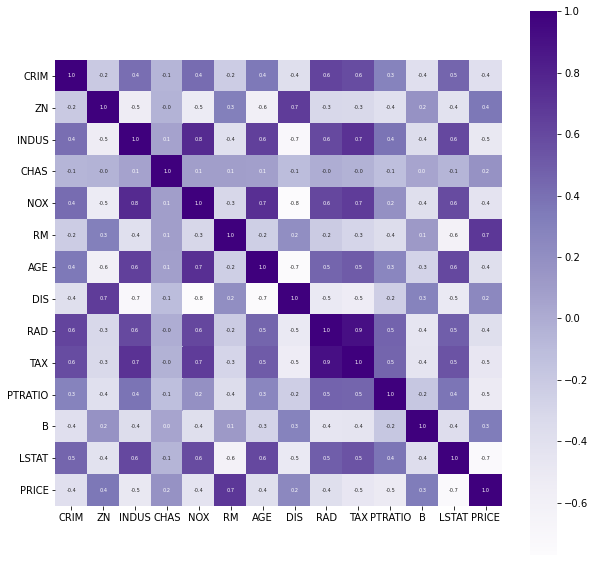

In [96]:
# plotting heatmap for correlation between data
plt.figure(figsize=(10,10))
sns.heatmap(corr,cbar=True,square=True,fmt='.1f', annot=True, annot_kws={'size':5}, cmap='Purples')

In [97]:
# Splitting data into target and independant variable
Y=df['PRICE']
X=df.drop(['PRICE'],axis=1)

In [98]:
# Splitting data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3,random_state=4)

##Linear Regression

Training the model

In [99]:
# Creating a linear regression model and train it
from sklearn.linear_model import LinearRegression
lr=LinearRegression().fit(X_train,Y_train)


Model evaluation

In [100]:
# Predicting a model using train data set
y_hat=lr.predict(X_train)

In [101]:
# model evaluation
from sklearn import metrics
print('R2 Score: ',metrics.r2_score(Y_train,y_hat))
print('MAE: ',metrics.mean_absolute_error(Y_train,y_hat))
print('MSE: ',metrics.mean_squared_error(Y_train,y_hat))
print('RMSE: ',np.sqrt(metrics.mean_absolute_error(Y_train,y_hat)))

R2 Score:  0.7465991966746854
MAE:  3.08986109497113
MSE:  19.07368870346903
RMSE:  1.7578000725256357


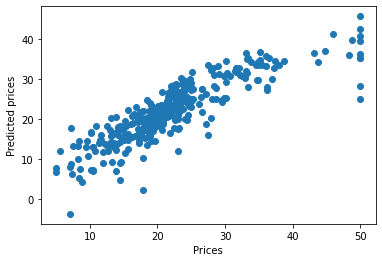

In [102]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(Y_train,y_hat)
plt.xlabel('Prices')
plt.ylabel('Predicted prices')
plt.show()

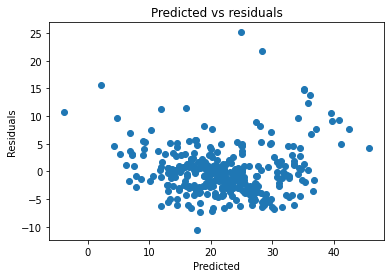

In [103]:
# Checking residuals
plt.scatter(y_hat,Y_train-y_hat)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

Using Test Dataset

In [104]:
y_hat_test=lr.predict(X_test)


In [105]:
# model evaluation
from sklearn import metrics
acc_lr = metrics.r2_score(Y_test, y_hat_test)
print('R2 Score: ',metrics.r2_score(Y_test,y_hat_test))
print('MAE: ',metrics.mean_absolute_error(Y_test,y_hat_test))
print('MSE: ',metrics.mean_squared_error(Y_test,y_hat_test))
print('RMSE: ',np.sqrt(metrics.mean_absolute_error(Y_test,y_hat_test)))

R2 Score:  0.7121818377409193
MAE:  3.859005592370744
MSE:  30.05399330712416
RMSE:  1.964435184059465


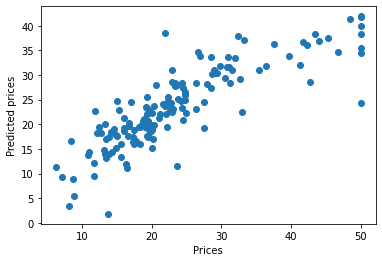

In [106]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(Y_test,y_hat_test)
plt.xlabel('Prices')
plt.ylabel('Predicted prices')
plt.show()

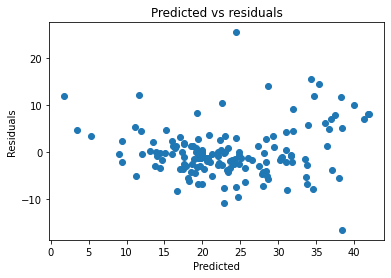

In [107]:
# Checking residuals
plt.scatter(y_hat_test,Y_test-y_hat_test)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

##XGBoost Regressor

Training a model

In [108]:
# import xgboost
from xgboost import XGBRegressor
# Create a XGBoost Regressor and train it
xg= XGBRegressor().fit(X_train,Y_train)


[14:24:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Model Evaluation

In [109]:
# Model prediction
y_hat =xg.predict(X_train)

In [110]:
# model evaluation
from sklearn import metrics
print('R2 Score: ',metrics.r2_score(Y_train,y_hat))
print('MAE: ',metrics.mean_absolute_error(Y_train,y_hat))
print('MSE: ',metrics.mean_squared_error(Y_train,y_hat))
print('RMSE: ',np.sqrt(metrics.mean_absolute_error(Y_train,y_hat)))

R2 Score:  0.9703652512761263
MAE:  1.1372202838208043
MSE:  2.230632123289034
RMSE:  1.0664053093551271


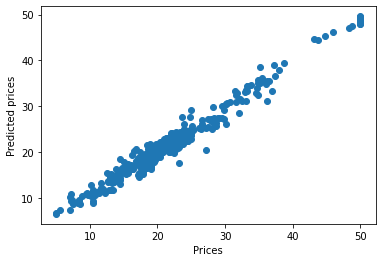

In [111]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(Y_train,y_hat)
plt.xlabel('Prices')
plt.ylabel('Predicted prices')
plt.show()

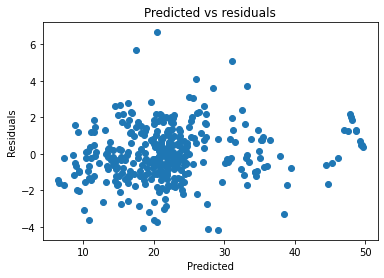

In [112]:
# Checking residuals
plt.scatter(y_hat,Y_train-y_hat)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

Using test data

In [113]:
# Making prediction
y_hat_test=xg.predict(X_test)

In [114]:
# model evaluation
from sklearn import metrics
acc_xg = metrics.r2_score(Y_test, y_hat_test)
print('R2 Score: ',metrics.r2_score(Y_test,y_hat_test))
print('MAE: ',metrics.mean_absolute_error(Y_test,y_hat_test))
print('MSE: ',metrics.mean_squared_error(Y_test,y_hat_test))
print('RMSE: ',np.sqrt(metrics.mean_absolute_error(Y_test,y_hat_test)))

R2 Score:  0.8494894736313225
MAE:  2.4509708843733136
MSE:  15.716320042597493
RMSE:  1.5655576911673723


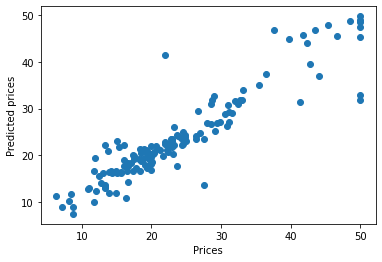

In [115]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(Y_test,y_hat_test)
plt.xlabel('Prices')
plt.ylabel('Predicted prices')
plt.show()

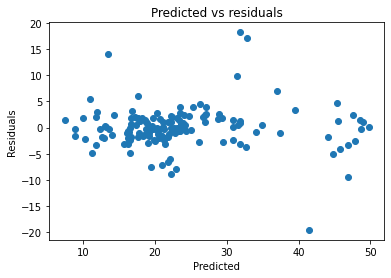

In [116]:
# Checking residuals
plt.scatter(y_hat_test,Y_test-y_hat_test)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

##SVM Regressor

In [117]:
# Preprocessing data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(X_train)
x_test=sc.transform(X_test)

Training the model

In [118]:
# import svm regressor
from sklearn import svm
# creating the model and train it
sv=svm.SVR().fit(x_train,Y_train)

Model prediction and evalualation

In [119]:
# model prediction
y_hat=sv.predict(x_train)

In [120]:
# model evaluation
from sklearn import metrics
print('R2 Score: ',metrics.r2_score(Y_train,y_hat))
print('MAE: ',metrics.mean_absolute_error(Y_train,y_hat))
print('MSE: ',metrics.mean_squared_error(Y_train,y_hat))
print('RMSE: ',np.sqrt(metrics.mean_absolute_error(Y_train,y_hat)))

R2 Score:  0.6419097248941195
MAE:  2.9361501059460293
MSE:  26.953752101332935
RMSE:  1.7135198002783714


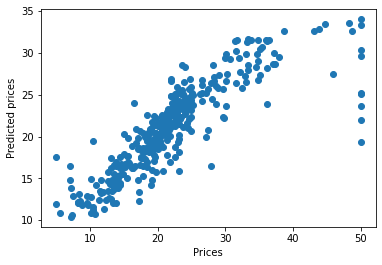

In [121]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(Y_train,y_hat)
plt.xlabel('Prices')
plt.ylabel('Predicted prices')
plt.show()

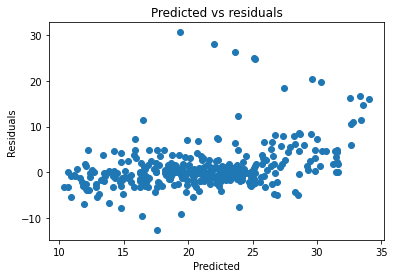

In [122]:
# Checking residuals
plt.scatter(y_hat,Y_train-y_hat)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

Using Test data

In [123]:
y_hat_test=sv.predict(x_test)

In [124]:
# model evaluation
from sklearn import metrics
acc_svm = metrics.r2_score(Y_test, y_hat_test)
print('R2 Score: ',metrics.r2_score(Y_test,y_hat_test))
print('MAE: ',metrics.mean_absolute_error(Y_test,y_hat_test))
print('MSE: ',metrics.mean_squared_error(Y_test,y_hat_test))
print('RMSE: ',np.sqrt(metrics.mean_absolute_error(Y_test,y_hat_test)))

R2 Score:  0.5900158460478174
MAE:  3.7561453553021686
MSE:  42.81057499010247
RMSE:  1.9380777474864543


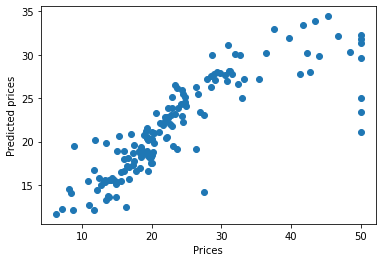

In [125]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(Y_test,y_hat_test)
plt.xlabel('Prices')
plt.ylabel('Predicted prices')
plt.show()

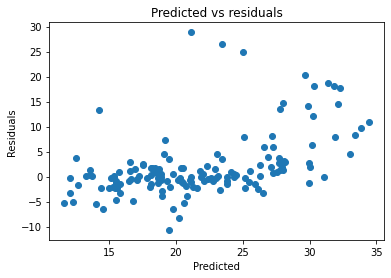

In [126]:
# Checking residuals
plt.scatter(y_hat_test,Y_test-y_hat_test)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

## Random Forest Regressor

Training the model

In [127]:
# Import randomforestregressor
from sklearn.ensemble import RandomForestRegressor
# Creating the model and train it
rfr=RandomForestRegressor().fit(X_train,Y_train)

Model Evaluation

In [128]:
# Model Prediction
y_hat=rfr.predict(X_train)


In [129]:
# model evaluation
from sklearn import metrics
print('R2 Score: ',metrics.r2_score(Y_train,y_hat))
print('MAE: ',metrics.mean_absolute_error(Y_train,y_hat))
print('MSE: ',metrics.mean_squared_error(Y_train,y_hat))
print('RMSE: ',np.sqrt(metrics.mean_absolute_error(Y_train,y_hat)))

R2 Score:  0.9790209753194113
MAE:  0.8565367231638414
MSE:  1.5791085932203381
RMSE:  0.9254926921180099


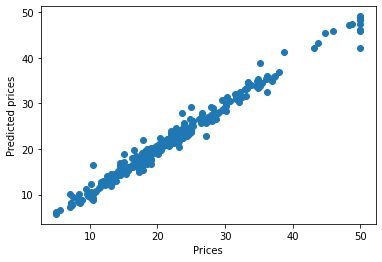

In [130]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(Y_train,y_hat)
plt.xlabel('Prices')
plt.ylabel('Predicted prices')
plt.show()

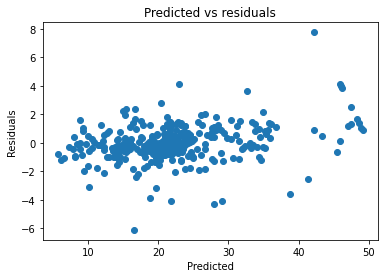

In [131]:
# Checking residuals
plt.scatter(y_hat,Y_train-y_hat)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

Using test data

In [132]:
y_hat_test=rfr.predict(X_test)

In [133]:
# model evaluation
from sklearn import metrics
acc_rfr = metrics.r2_score(Y_test, y_hat_test)
print('R2 Score: ',metrics.r2_score(Y_test,y_hat_test))
print('MAE: ',metrics.mean_absolute_error(Y_test,y_hat_test))
print('MSE: ',metrics.mean_squared_error(Y_test,y_hat_test))
print('RMSE: ',np.sqrt(metrics.mean_absolute_error(Y_test,y_hat_test)))

R2 Score:  0.8294275452028641
MAE:  2.5187828947368422
MSE:  17.811188059210533
RMSE:  1.5870673882153972


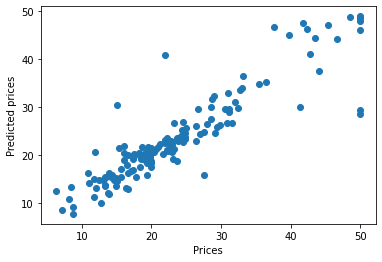

In [134]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(Y_test,y_hat_test)
plt.xlabel('Prices')
plt.ylabel('Predicted prices')
plt.show()

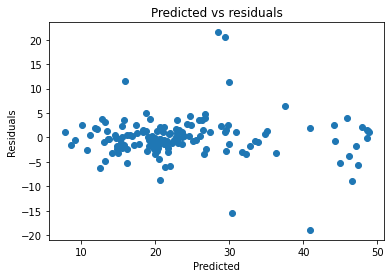

In [135]:
# Checking residuals
plt.scatter(y_hat_test,Y_test-y_hat_test)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

## Evaluation and comparision of all the models

In [137]:
models= pd.DataFrame({'Model': ['Linear Regression', 'Random Forest', 'XGBoost', 'Support Vector Machines'], 'R2-Score':[acc_lr,acc_rfr,acc_xg,acc_svm]})
models.sort_values(by='R2-Score', ascending=False)

,Model,R2-Score
2,XGBoost,0.849489
1,Random Forest,0.829428
0,Linear Regression,0.712182
3,Support Vector Machines,0.590016


XGBoost Regressor works well for this problem.